# AgML Models

The `agml.models` module contains pretrained models and benchmarks on each of the public datasets in AgML. Currently, AgML provides an easy-to-use pipeline for inferencing with these models and evaluating them on common metrics. If you want to train the models, we have provided examples with which to get started in the `experiments` directory.

In [1]:
!pip install -q agml

In [2]:
!pip install pytorch-lightning
!pip install ensemble-boxes
!pip install effdet==0.2.4

In [3]:
import agml
import agml.models

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Loading Benchmarks

The `agml.models` module contains three primary models, based on their task:

| AgML Endpoint | Architecture|
|---|---|
| `agml.models.ClassificationModel`| EfficientNetB4 |
| `agml.models.SegmentationModel`| DeepLabV3 (ResNet50) |
| `agml.models.DetectionModel`| EfficientDetD4 |

By default, when downloading a benchmark, it will be saved to **`~/.agml/models`** (although this can be overriden using `agml.backend.set_model_save_path`).

Downloading: "https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d4_49-f56376d9.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientdet_d4_49-f56376d9.pth


[AgML Download]: Extracting files for mango_detection_australia... Done!

You have just downloaded mango_detection_australia.

This dataset has no license.

When using this dataset, please cite the following:

@Misc{Koirala2019,
  author={Koirala, Anand and Walsh, Kerry and Wang, Z. and McCarthy, C.},
  title={MangoYOLO data set},
  year={2019},
  month={2021},
  day={10-19},
  publisher={Central Queensland University},
  keywords={Mango images; Fruit detection; Yield estimation; Mango; Agricultural Land Management; Horticultural Crop Growth and Development},
  abstract={Datasets and directories are structured similar to the PASCAL VOC dataset, avoiding the need to change scripts already available, with the detection frameworks ready to parse PASCAL VOC annotations into their format. The sub-directory JPEGImages consist of 1730 images (612x512 pixels) used for train, test and validation. Each image has at least one annotated fruit. The sub-directory Annotations consists of all the anno

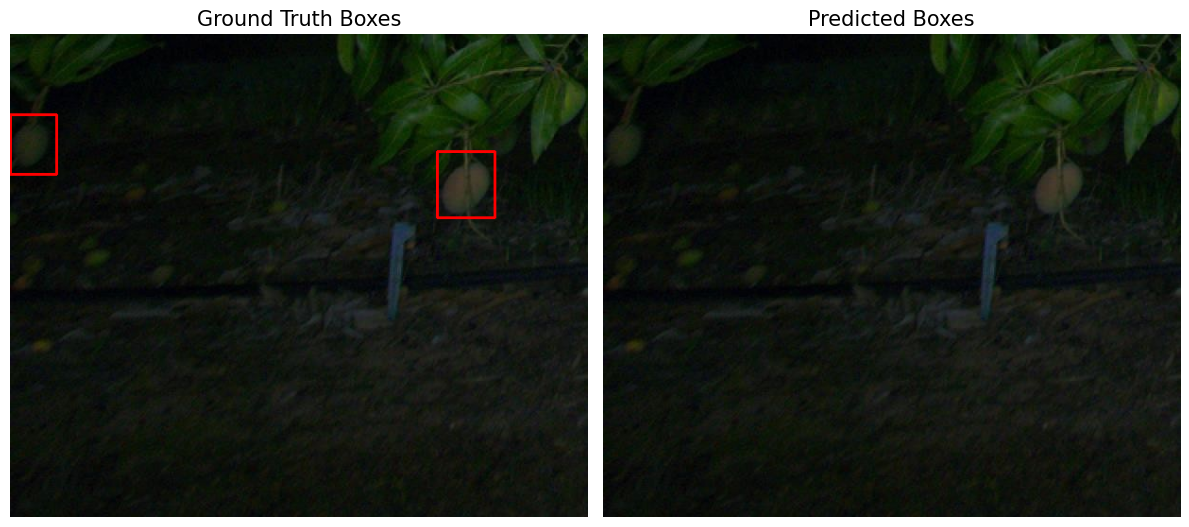

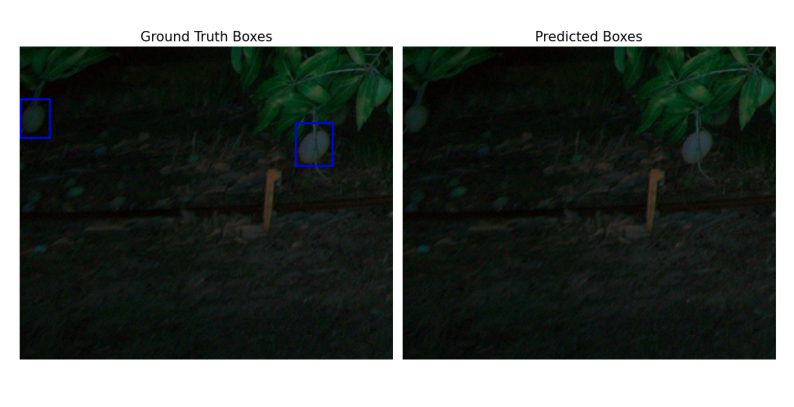

In [4]:
# Construct a one-class model.
detector = agml.models.DetectionModel(num_classes = 1)

# Visualize predictions.
grape_day = agml.data.AgMLDataLoader('mango_detection_australia')
image, truth = grape_day[0]
# pred_boxes, *_ = detector.predict(image)
# _ = agml.viz.visualize_real_and_predicted_bboxes(image, truth_boxes = truth, predicted_boxes = pred_boxes)
pred_boxes, *_ = detector.predict(image)
_ = agml.viz.show_object_detection_truth_and_prediction(image, real_boxes = truth, predicted_boxes = pred_boxes)

By default, the model uses COCO weights, and thus the predictions are highly inaccurate. To load a benchmark for a model, use the `load_benchmark` method and input the AgML dataset whose benchmark you want.

/usr/local/lib/python3.10/dist-packages/agml/models/base.py:176: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(benchmark_path, map_location = 'cpu')


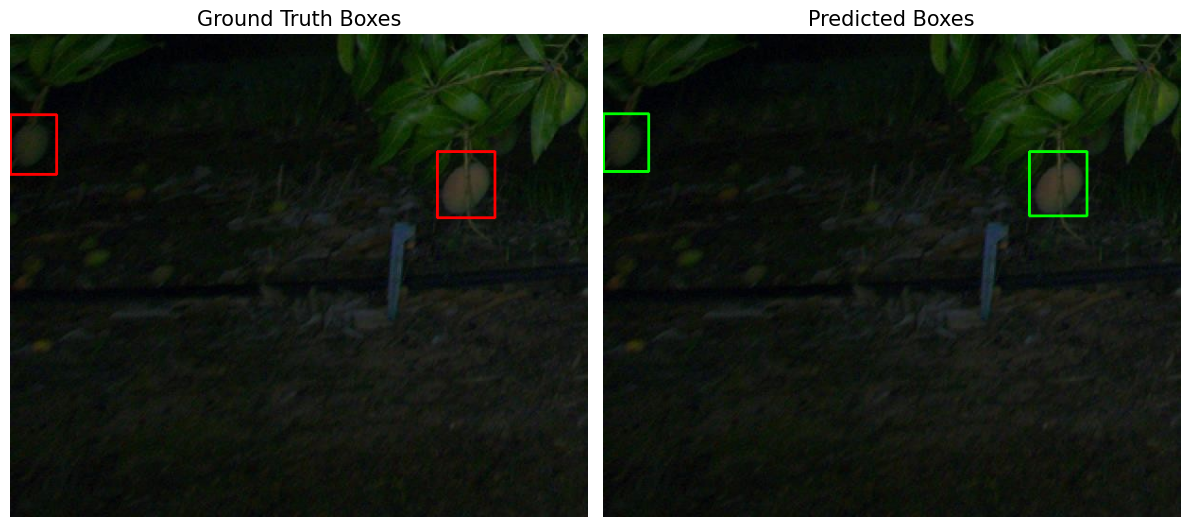

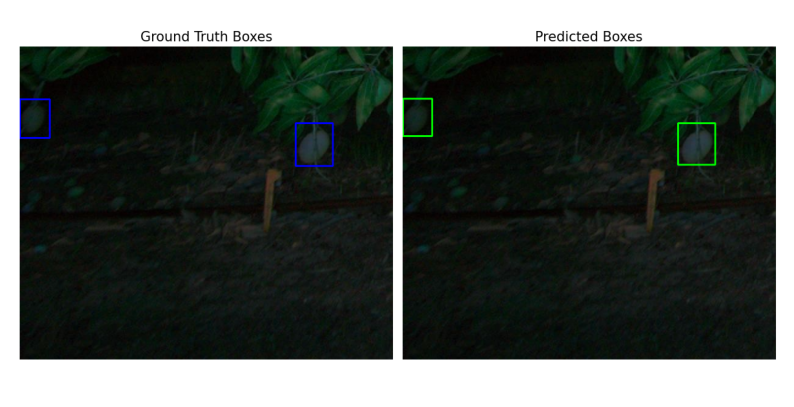

In [5]:
# Load the `mango_detection_australia` benchmark.
detector.load_benchmark('mango_detection_australia')

# Visualize predictions.
image, truth = grape_day[0]
# pred_boxes, *_ = detector.predict(image)
# _ = agml.viz.visualize_real_and_predicted_bboxes(image, truth_boxes = truth, predicted_boxes = pred_boxes)
pred_boxes, *_ = detector.predict(image)
_ = agml.viz.show_object_detection_truth_and_prediction(image, real_boxes = truth, predicted_boxes = pred_boxes)

You can use the `benchmark` property to view useful information regarding the model's benchmark.

In [6]:
print(detector.benchmark)

<Benchmark mango_detection_australia>({'metric': {'mAP': 95.32}, 'hyperparameters': {'epochs': 50, 'model_config': {'box_loss_weight': 100.0, 'image_size': [512, 512], 'confidence_threshold': 0.3}, 'optimizer_config': {'lr': 0.0002}}})


We can do the same for semantic segmentation models:

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 116MB/s]


[AgML Download]: Extracting files for apple_flower_segmentation... Done!

You have just downloaded apple_flower_segmentation.

This dataset is licensed under the US Public Domain license.
To learn more, visit: https://www.usa.gov/government-works

When using this dataset, please cite the following:

@ARTICLE{8392727,
  author={Dias, Philipe A. and Tabb, Amy and Medeiros, Henry},
  journal={IEEE Robotics and Automation Letters}, 
  title={Multispecies Fruit Flower Detection Using a Refined Semantic Segmentation Network}, 
  year={2018},
  volume={3},
  number={4},
  pages={3003-3010},
  doi={10.1109/LRA.2018.2849498}}

You can find additional information about this dataset at:
https://data.nal.usda.gov/dataset/data-multi-species-fruit-flower-detection-using-refined-semantic-segmentation-network

This message will not be automatically shown
again. To view this message again, in an AgMLDataLoader
run `loader.info.citation_summary()`. Otherwise, you
can use `agml.data.source(<name>).citati

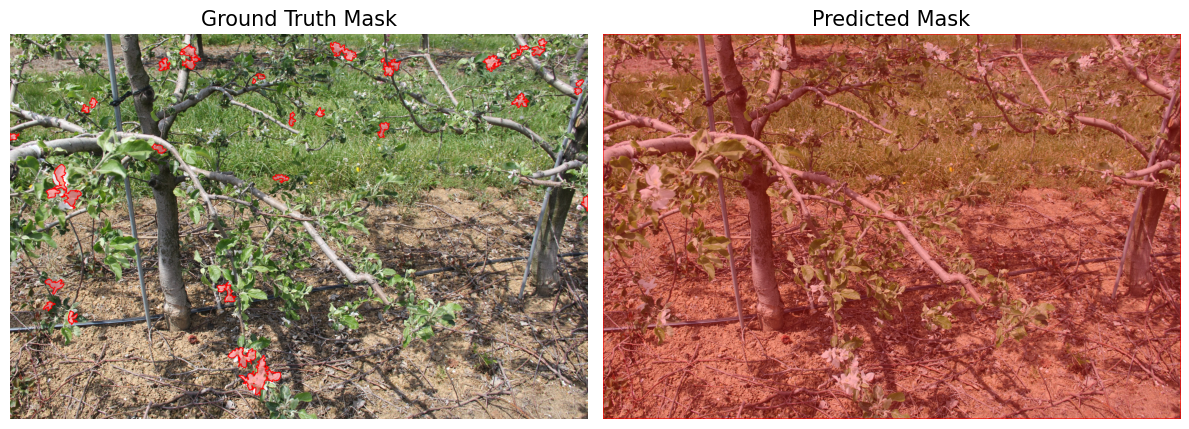

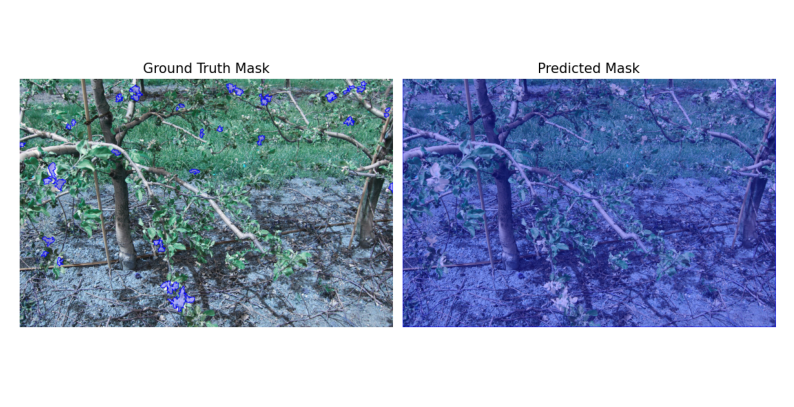

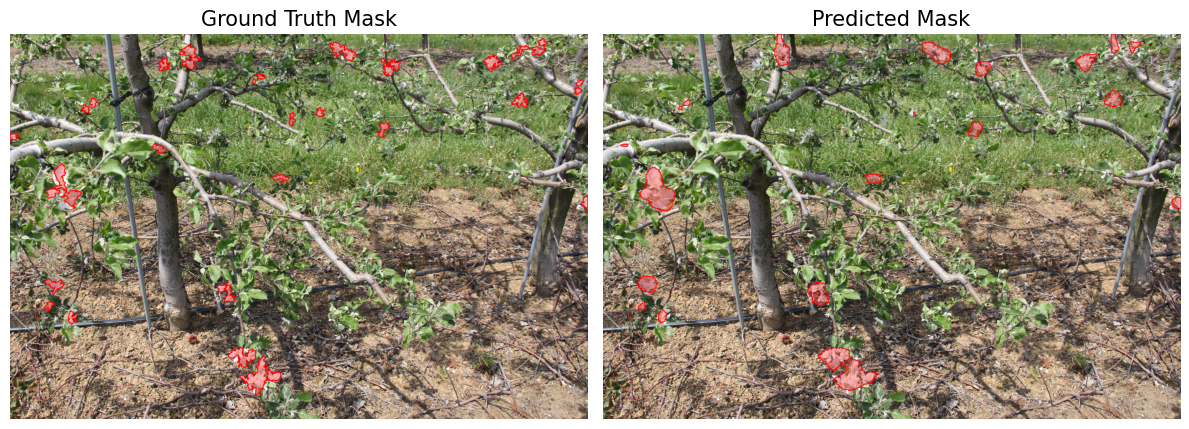

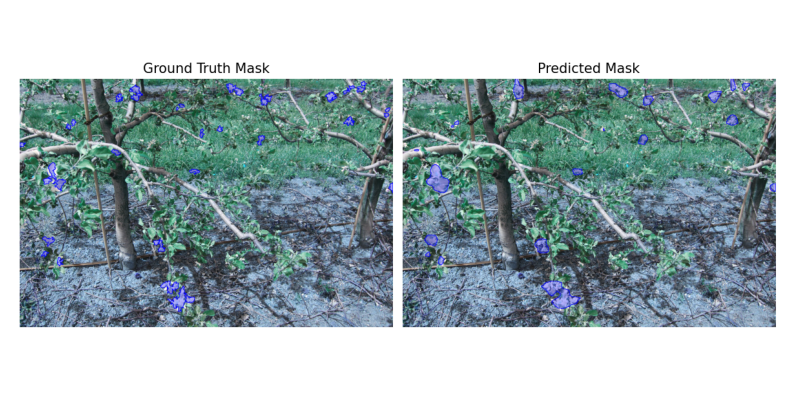

In [7]:
# Construct a one-class model.
seg = agml.models.SegmentationModel(num_classes = 1)

# Visualize predictions.
apple_flower = agml.data.AgMLDataLoader('apple_flower_segmentation')
image, truth = apple_flower[0]
pred_mask = seg.predict(image)
_ = agml.viz.show_semantic_segmentation_truth_and_prediction(image, real_mask = truth, predicted_mask = pred_mask)

# Load the `apple_flower_segmentation` benchmark.
seg.load_benchmark('apple_flower_segmentation')

# Visualize predictions.
image, truth = apple_flower[0]
pred_mask = seg.predict(image)
_ = agml.viz.show_semantic_segmentation_truth_and_prediction(image, real_mask = truth, predicted_mask = pred_mask)

## Evaluating Models

The `agml.models` package also comes with a sub-module, `agml.models.metrics`, with common metrics for agricultural deep learning tasks. Currently, it includes `agml.models.metrics.MeanAveragePrecision`, for object detection, and `agml.models.metrics.Accuracy`, for image classification.

You can either use the metrics on your own, in a training loop, or implicitly use them by calling `model.evaluate()` on an AgML model. For example, on an object detection model:

In [8]:
# Construct a model with a benchmark for `fruit_detection_worldwide`.
detector = agml.models.DetectionModel(num_classes = 7)
detector.load_benchmark('fruit_detection_worldwide')
detector.cuda()

# Evaluate on a subset of the dataset.
dataset = agml.data.AgMLDataLoader('fruit_detection_worldwide').take_random(100)
result = detector.evaluate(dataset)
print(f"Calculated Mean Average Precision: {result.numpy() * 100}%")

/usr/local/lib/python3.10/dist-packages/agml/models/base.py:176: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(benchmark_path, map_location = 'cpu')


[AgML Download]: Extracting files for fruit_detection_worldwide... Done!

You have just downloaded fruit_detection_worldwide.

This dataset has no license.

When using this dataset, please cite the following:

@Article{s16081222,
  AUTHOR = {Sa, Inkyu and Ge, Zongyuan and Dayoub, Feras and Upcroft, Ben and Perez, Tristan and McCool, Chris},
  TITLE = {DeepFruits: A Fruit Detection System Using Deep Neural Networks},
  JOURNAL = {Sensors},
  VOLUME = {16},
  YEAR = {2016},
  NUMBER = {8},
  ARTICLE-NUMBER = {1222},
  URL = {https://www.mdpi.com/1424-8220/16/8/1222},
  ISSN = {1424-8220},
  ABSTRACT = {This paper presents a novel approach to fruit detection using deep convolutional neural networks. The aim is to build an accurate, fast and reliable fruit detection system, which is a vital element of an autonomous agricultural robotic platform; it is a key element for fruit yield estimation and automated harvesting. Recent work in deep neural networks has led to the development of a state

Calculating Mean Average Precision: 100%|██████████| 100/100 [00:13<00:00,  7.57it/s]


Calculated Mean Average Precision: 72.48174548149109%


Or, a semantic segmentation model:

In [10]:
# Construct a model with a benchmark for `rice_seedling_segmentation`.
seg = agml.models.SegmentationModel(num_classes = 1)
seg.load_benchmark('apple_segmentation_minnesota')

# Evaluate on a subset of the dataset.
dataset = agml.data.AgMLDataLoader('apple_segmentation_minnesota').take_random(50)
result = seg.evaluate(dataset)
print(f"Calculated intersection-over-union: {result * 100}%")

TypeError: JaccardIndex.__new__() missing 1 required positional argument: 'task'

## Additional Training Tools

The `agml.models` module also comes with additional tools which can be useful when attempting to train your own model.

The `agml.models.losses` module contains standard loss functions for training models, such as `agml.models.losses.DiceLoss`, for semantic segmentation.

The `agml.models.preprocessing` submodule contains preprocessing tools, such as the `EfficientDetPreprocessor`, which prepares data for the EfficientDet format (`yxyx` annotations, PyTorch conversion, etc). It can be used as follows:

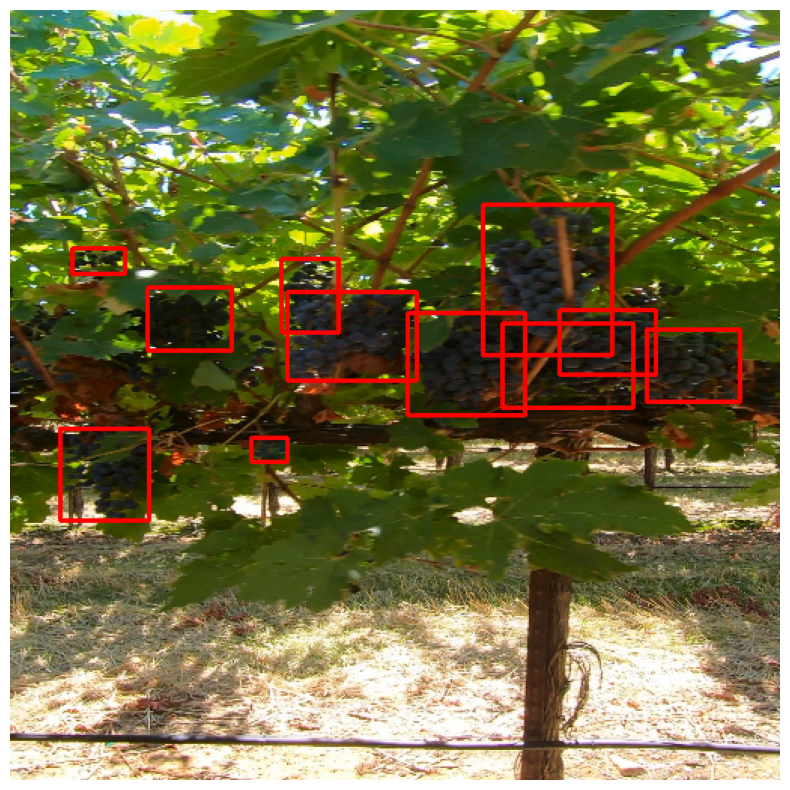

In [35]:
import albumentations as A

# Construct a loader and apply the preprocessor.
loader = agml.data.AgMLDataLoader('grape_detection_californiaday')
processor = agml.models.preprocessing.EfficientDetPreprocessor(image_size = 512, augmentation = [A.RandomRotate90()])
loader.transform(dual_transform = processor)

# Inspect a data sample.
image, truth = loader[0]
_ = agml.viz.show_image_and_boxes(image, truth, bbox_format = 'efficientdet')

## Next Steps

You're now ready to use the `agml.models` module with pretrained models and benchmarks. We aim to add support for training models and extend inference capabilities in the future.